In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
dataset = pd.read_csv('train_data_evaluation_part2.csv',index_col=0)

In [3]:
data = dataset.copy()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82580 entries, 0 to 82579
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    82580 non-null  int64  
 1   Nationality           82580 non-null  object 
 2   Age                   78834 non-null  float64
 3   DaysSinceCreation     82580 non-null  int64  
 4   AverageLeadTime       82580 non-null  int64  
 5   LodgingRevenue        82580 non-null  float64
 6   OtherRevenue          82580 non-null  float64
 7   BookingsCanceled      82580 non-null  int64  
 8   BookingsNoShowed      82580 non-null  int64  
 9   BookingsCheckedIn     82580 non-null  int64  
 10  PersonsNights         82580 non-null  int64  
 11  RoomNights            82580 non-null  int64  
 12  DaysSinceLastStay     82580 non-null  int64  
 13  DaysSinceFirstStay    82580 non-null  int64  
 14  DistributionChannel   82580 non-null  object 
 15  MarketSegment      

In [5]:
data.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

In [6]:
data.size

2394820

In [7]:
data.isna().sum()

ID                         0
Nationality                0
Age                     3746
DaysSinceCreation          0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [8]:
data['Age'].fillna(int(data['Age'].mean()),inplace = True)

In [9]:
data['Age'].isna().sum()

0

In [10]:
data.dtypes.value_counts()

int64      23
float64     3
object      3
dtype: int64

In [11]:
data.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,45.0,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
num = list(data.select_dtypes(include=['int64','float64']).keys())
print(num)

['ID', 'Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'DaysSinceLastStay', 'DaysSinceFirstStay', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom']


In [13]:
cat = list(data.select_dtypes(include='O').keys())
print(cat)

['Nationality', 'DistributionChannel', 'MarketSegment']


In [14]:
col = data.select_dtypes(include = 'object')

In [15]:
data.Nationality.unique()

array(['PRT', 'DEU', 'FRA', 'JPN', 'IRL', 'ESP', 'BEL', 'NLD', 'AUT',
       'ITA', 'CHN', 'RUS', 'POL', 'USA', 'HUN', 'CRI', 'MEX', 'CHE',
       'ROU', 'GBR', 'BIH', 'BRA', 'FIN', 'AGO', 'CAN', 'ZAF', 'TWN',
       'GRC', 'AUS', 'ISR', 'BGR', 'SAU', 'SWE', 'CYP', 'ARG', 'ARM',
       'CHL', 'MAR', 'MOZ', 'KOR', 'TUN', 'DNK', 'NOR', 'MYS', 'EGY',
       'IND', 'HRV', 'CPV', 'JOR', 'COD', 'DZA', 'LUX', 'TUR', 'IRN',
       'LBY', 'PAN', 'COL', 'VEN', 'GNB', 'CZE', 'AND', 'SVN', 'PER',
       'ATF', 'UGA', 'AZE', 'NZL', 'LTU', 'SRB', 'EST', 'KAZ', 'KWT',
       'IDN', 'UKR', 'SVK', 'MLI', 'ARE', 'BGD', 'THA', 'TZA', 'LVA',
       'PHL', 'BHR', 'NAM', 'BOL', 'SGP', 'CMR', 'MLT', 'URY', 'PAK',
       'JAM', 'ECU', 'SYC', 'QAT', 'PRY', 'BRB', 'OMN', 'TMP', 'ABW',
       'LBN', 'AIA', 'SLV', 'DMA', 'CUB', 'VNM', 'GEO', 'IRQ', 'GAB',
       'PYF', 'LIE', 'SEN', 'BLR', 'ISL', 'DOM', 'GUY', 'LCA', 'ATA',
       'NGA', 'RWA', 'CIV', 'ALB', 'MKD', 'MNE', 'GTM', 'GHA', 'MDV',
       'MCO', 'MUS',

In [16]:
len(data.Nationality.unique())

188

In [17]:
data.DistributionChannel.unique()

array(['Corporate', 'Travel Agent/Operator', 'Direct',
       'Electronic Distribution'], dtype=object)

In [18]:
len(data.DistributionChannel.unique())

4

In [19]:
data.MarketSegment.unique()

array(['Corporate', 'Travel Agent/Operator', 'Other', 'Direct',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

In [20]:
len(data.MarketSegment.unique())

7

In [21]:
encoder = LabelEncoder()

In [22]:
for i in col:
    data[i] = encoder.fit_transform(data[i])

In [23]:
data.dtypes

ID                        int64
Nationality               int32
Age                     float64
DaysSinceCreation         int64
AverageLeadTime           int64
LodgingRevenue          float64
OtherRevenue            float64
BookingsCanceled          int64
BookingsNoShowed          int64
BookingsCheckedIn         int64
PersonsNights             int64
RoomNights                int64
DaysSinceLastStay         int64
DaysSinceFirstStay        int64
DistributionChannel       int32
MarketSegment             int32
SRHighFloor               int64
SRLowFloor                int64
SRAccessibleRoom          int64
SRMediumFloor             int64
SRBathtub                 int64
SRShower                  int64
SRCrib                    int64
SRKingSizeBed             int64
SRTwinBed                 int64
SRNearElevator            int64
SRAwayFromElevator        int64
SRNoAlcoholInMiniBar      int64
SRQuietRoom               int64
dtype: object

In [24]:
data.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,137,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,137,45.0,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,43,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,57,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,57,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
data.corr()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,1.000000,-0.031489,-0.124206,-0.986954,-0.144062,-0.094376,-0.159731,-0.018145,-0.012495,-0.280559,...,-0.004329,0.008177,0.005186,0.038732,0.024663,0.021651,0.001025,-0.009904,0.012206,0.053258
Nationality,-0.031489,1.000000,-0.022753,0.036853,-0.096242,-0.037567,-0.043904,0.030955,0.019987,0.050594,...,0.007774,0.000354,-0.007308,0.004544,-0.017577,-0.021811,0.002974,0.002052,-0.000486,-0.058513
Age,-0.124206,-0.022753,1.000000,0.121362,0.246769,0.049783,0.112285,0.004213,0.006239,0.126434,...,0.007024,-0.017042,0.010661,-0.115305,-0.002744,0.013461,0.013011,0.009459,-0.010664,0.014196
DaysSinceCreation,-0.986954,0.036853,0.121362,1.000000,0.132253,0.085673,0.153800,0.018090,0.012581,0.273504,...,0.004831,-0.010994,-0.006291,-0.036748,-0.027906,-0.025316,-0.002045,0.010351,-0.011250,-0.055090
AverageLeadTime,-0.144062,-0.096242,0.246769,0.132253,1.000000,0.213989,0.238732,-0.015530,-0.011905,0.238262,...,-0.000392,-0.006810,0.008143,-0.039513,-0.014470,0.080111,0.000262,-0.000218,-0.006315,0.008595
LodgingRevenue,-0.094376,-0.037567,0.049783,0.085673,0.213989,1.000000,0.525288,0.070747,0.062404,0.420751,...,0.005712,0.005081,0.011728,-0.015679,0.014073,0.010036,0.004305,0.012000,-0.000964,0.052264
OtherRevenue,-0.159731,-0.043904,0.112285,0.153800,0.238732,0.525288,1.000000,0.043721,0.034086,0.300977,...,0.007167,0.009703,0.011356,0.002525,0.013125,0.015287,0.001098,0.011606,0.004913,0.016047
BookingsCanceled,-0.018145,0.030955,0.004213,0.018090,-0.015530,0.070747,0.043721,1.000000,0.314690,0.464598,...,0.023356,-0.001617,-0.001269,-0.003471,0.017958,-0.007280,-0.000530,0.004246,-0.000335,-0.006286
BookingsNoShowed,-0.012495,0.019987,0.006239,0.012581,-0.011905,0.062404,0.034086,0.314690,1.000000,0.286262,...,-0.000642,-0.001146,-0.000899,-0.002460,0.011400,-0.000660,-0.000376,-0.001288,-0.000238,-0.003834
BookingsCheckedIn,-0.280559,0.050594,0.126434,0.273504,0.238262,0.420751,0.300977,0.464598,0.286262,1.000000,...,0.010944,-0.004671,-0.000490,-0.035802,0.010867,-0.023750,0.001039,0.009080,-0.004712,-0.010975


In [27]:
data1=data
y=data1['BookingsCheckedIn']
x=data1.drop(['BookingsCheckedIn'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

In [28]:
data1

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,137,51.0,150,45,371.00,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,137,45.0,1095,61,280.00,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,43,31.0,1095,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,57,60.0,1095,93,240.00,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,57,51.0,1095,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82575,82576,158,51.0,12,114,190.08,6.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
82576,82577,158,50.0,12,0,0.00,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
82577,82578,43,50.0,12,18,222.00,255.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
82578,82579,137,45.0,12,11,255.00,9.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [29]:
data1.corr()['BookingsCheckedIn']

ID                     -0.280559
Nationality             0.050594
Age                     0.126434
DaysSinceCreation       0.273504
AverageLeadTime         0.238262
LodgingRevenue          0.420751
OtherRevenue            0.300977
BookingsCanceled        0.464598
BookingsNoShowed        0.286262
BookingsCheckedIn       1.000000
PersonsNights           0.486211
RoomNights              0.659022
DaysSinceLastStay       0.381401
DaysSinceFirstStay      0.425817
DistributionChannel    -0.084875
MarketSegment          -0.085386
SRHighFloor            -0.017474
SRLowFloor             -0.002857
SRAccessibleRoom        0.003524
SRMediumFloor           0.010944
SRBathtub              -0.004671
SRShower               -0.000490
SRCrib                 -0.035802
SRKingSizeBed           0.010867
SRTwinBed              -0.023750
SRNearElevator          0.001039
SRAwayFromElevator      0.009080
SRNoAlcoholInMiniBar   -0.004712
SRQuietRoom            -0.010975
Name: BookingsCheckedIn, dtype: float64

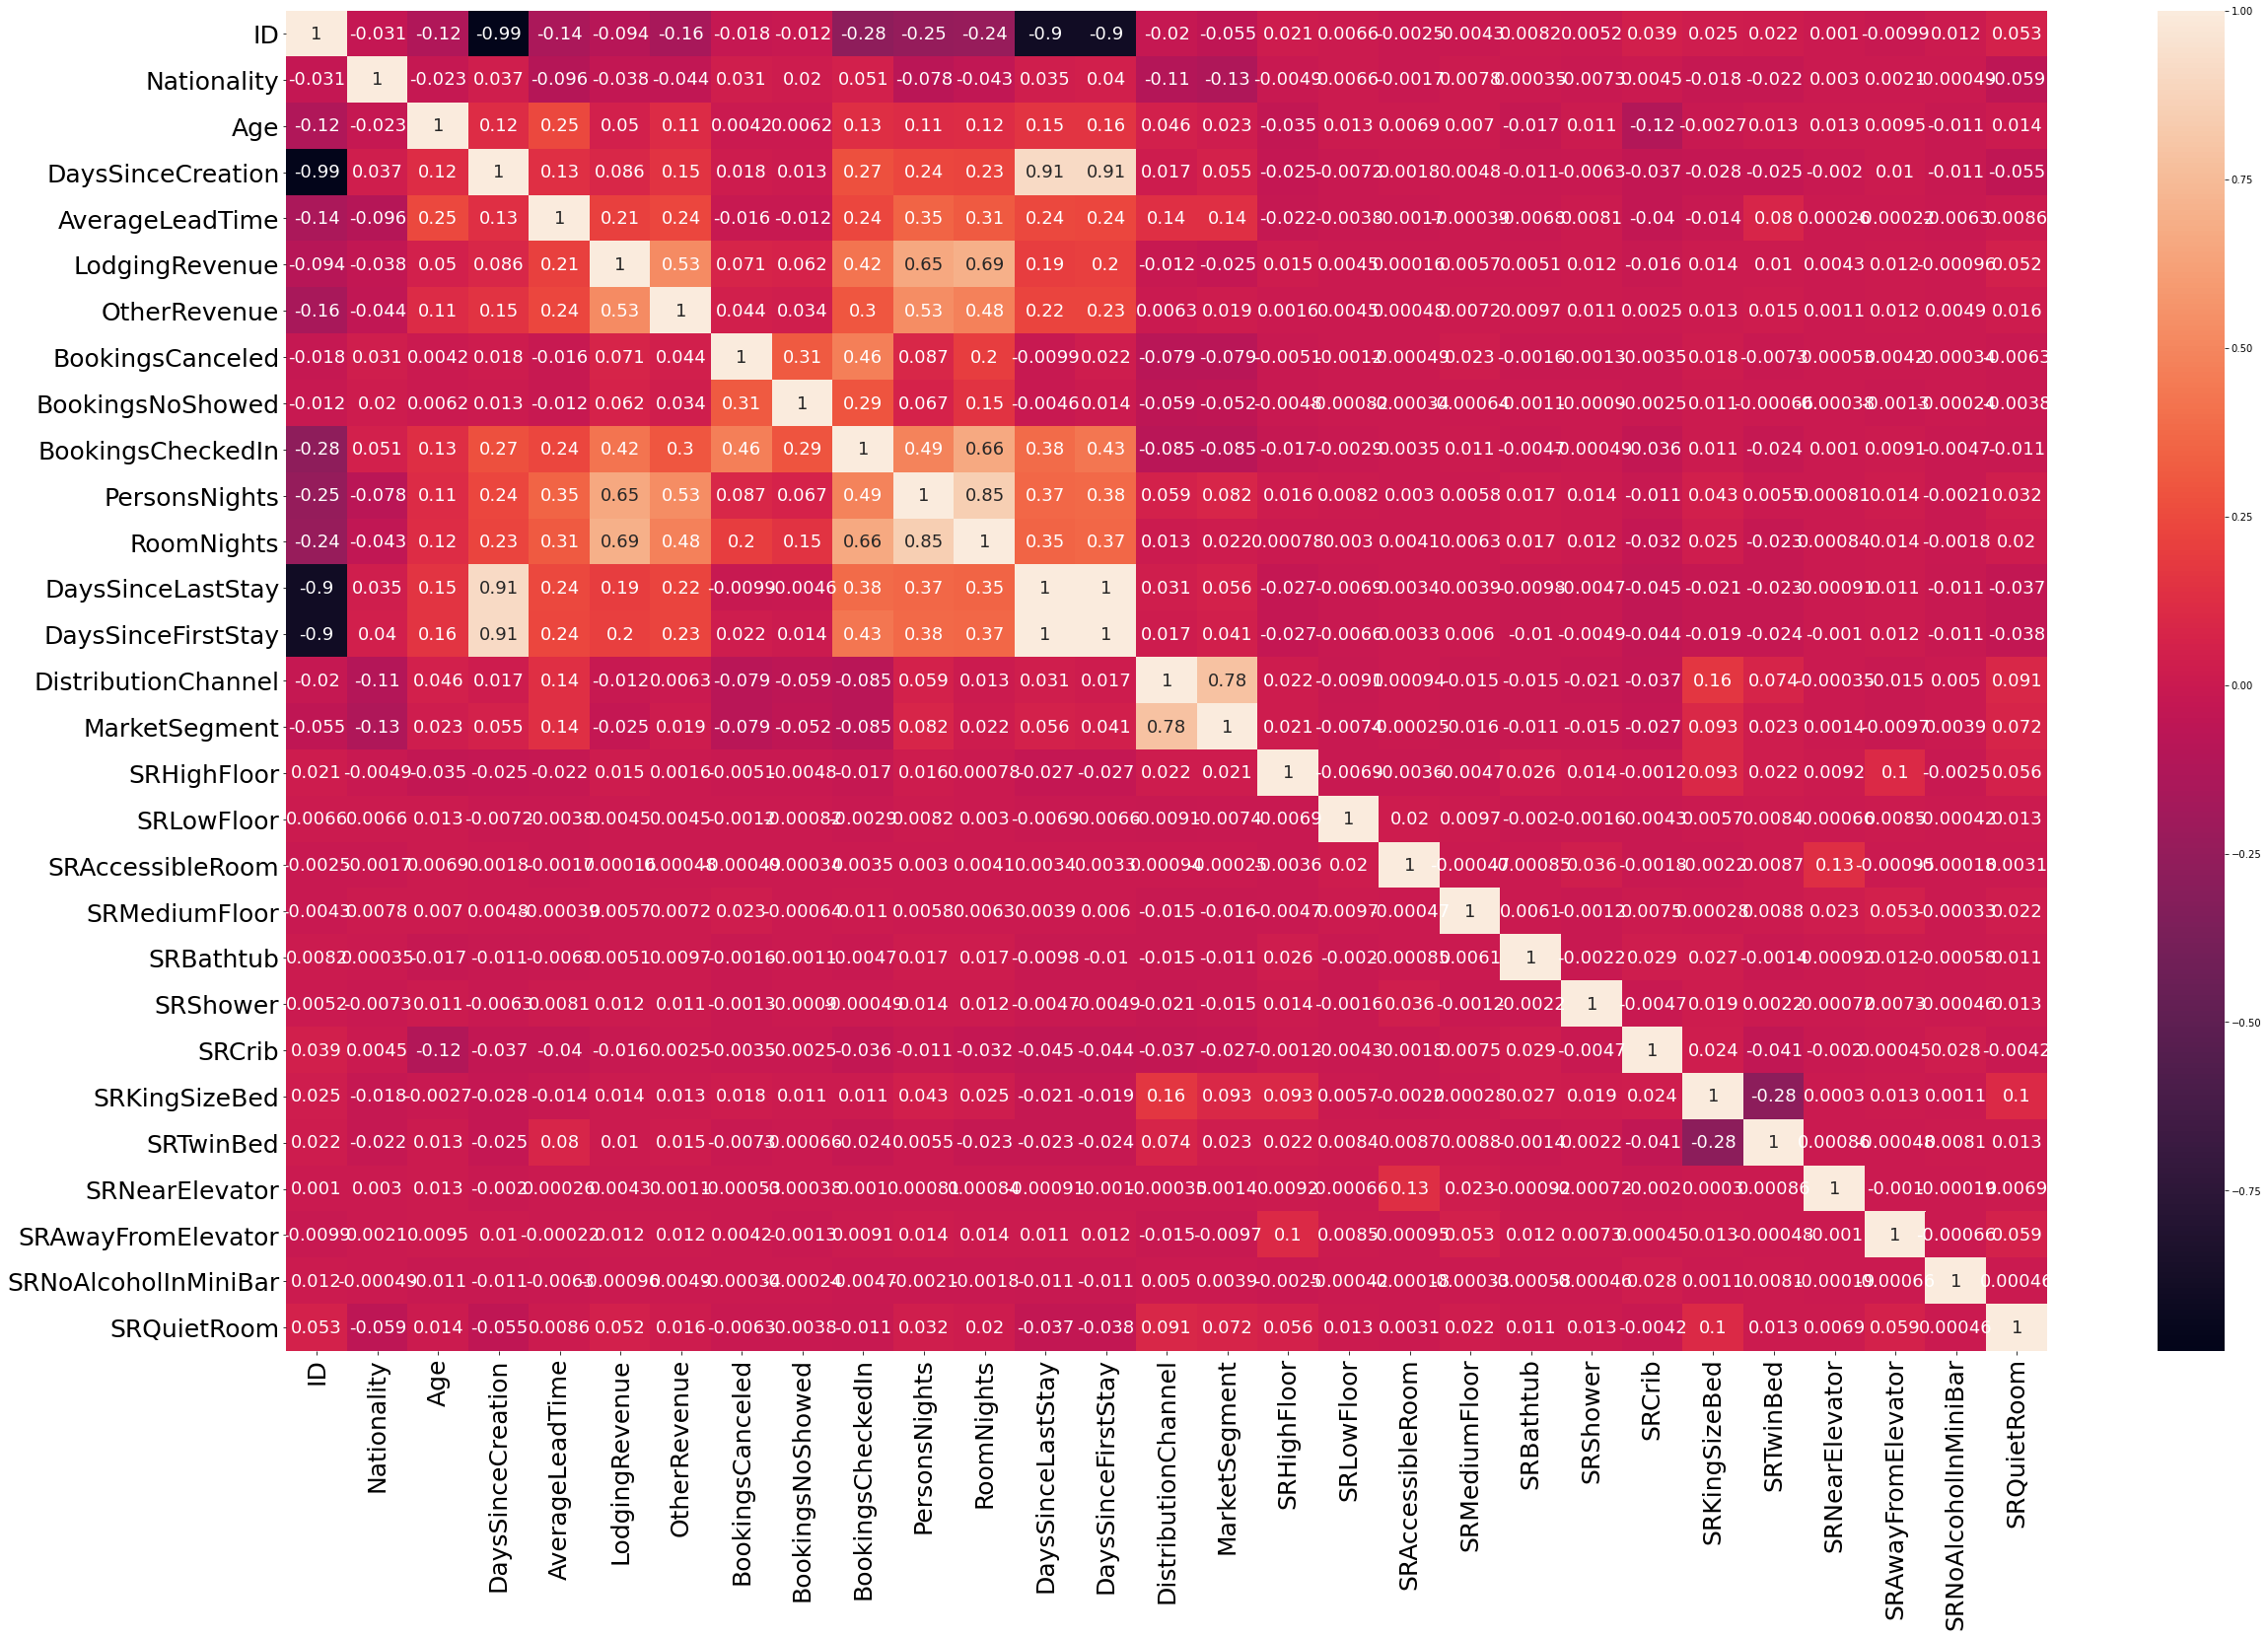

In [30]:
plt.figure(figsize=(40,25))
sns.heatmap(data1.corr(),annot=True,annot_kws={'size':18})
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

In [31]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
y.prob=logreg.decision_function(x_test)
acc_log = round(logreg.score(x_test, y_test) * 100, 5)
print('Score:',acc_log)
print('Confusion matrix:\n',confusion_matrix(y_test, y_pred))

Score: 97.96077
Confusion matrix:
 [[ 9728     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [  127 30711     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [    3   536     9     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [    1    64    11     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [    0    25     5     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [    0     9     2     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
  

C:\Users\SATHISH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
logreg_fpr,logreg_tpr,threshold=roc_curve(y_test,y_pred,pos_label=2)
auc_logreg=auc(logreg_fpr,logreg_tpr)

In [33]:
#Naive bayes classifier
nbc = GaussianNB()
nbc.fit(x_train, y_train)
y_pred = nbc.predict(x_test)
acc_nbc = round(nbc.score(x_test, y_test) * 100, 2)
print('Score:',acc_nbc)
print('Confusion matrix:\n',confusion_matrix(y_test, y_pred))

Score: 96.12
Confusion matrix:
 [[ 9728     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [    0 29877   802   112    11     3    29     1     0     1     0     0
      2     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [    0   445    68    12     6     6    11     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [    0    40    12     6     3     6     7     1     1     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [    0    12     2     0     2     4     9     0     1     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [    0     3     0     3     2     0     2     0     0     0     0     0
      1     0     0     0     0     0     0     0     0     0     0     0
     

In [34]:
nbc_fpr,nbc_tpr,threshold=roc_curve(y_test,y_pred,pos_label=2)
auc_nbc=auc(nbc_fpr,nbc_tpr)

In [35]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_test, y_test) * 100, 2)
print('Score:',acc_svc)
print('Confusion matrix:\n',confusion_matrix(y_test, y_pred))

Score: 95.47
Confusion matrix:
 [[ 9499   229     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [  917 29921     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [   16   532     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [    1    75     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [    2    28     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [    0    11     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
     

In [36]:
svc_fpr,svc_tpr,threshold=roc_curve(y_test,y_pred,pos_label=2)
auc_svc=auc(svc_fpr,svc_tpr)

In [37]:
#Random Forest
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
acc_rf = round(rf.score(x_test, y_test) * 100, 2)
print('Score:',acc_rf)
print('Confusion matrix:\n',confusion_matrix(y_test, y_pred))

Score: 98.52
Confusion matrix:
 [[ 9728     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [    0 30835     2     0     1     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [    0   438   109     1     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [    0    45    29     1     0     0     0     1     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [    0    14    12     0     3     0     1     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [    0     5     2     1     1     0     0     0     1     1     0     0
      0     0     0     0     0     0     0     0

In [38]:
rf_fpr,rf_tpr,threshold=roc_curve(y_test,y_pred,pos_label=2)
auc_rf=auc(rf_fpr,rf_tpr)

In [39]:
#knn neghbours
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_test, y_test) * 100, 2)
print('Score:',acc_knn)
print('Confusion matrix:\n',confusion_matrix(y_test, y_pred))

Score: 98.21
Confusion matrix:
 [[ 9719     7     2     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [   42 30763    33     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [    3   476    68     1     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [    0    65    11     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [    0    26     4     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [    0     9     2     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
     

In [40]:
knn_fpr,knn_tpr,threshold=roc_curve(y_test,y_pred,pos_label=2)
auc_knn=auc(knn_fpr,knn_tpr)

In [41]:
model_names=['Logistic Regression','Naive Bayes Classifier','SVC(Support Vector Classification)','Random Forest','k-Nearest Neighbors']
accuracy=[acc_log,acc_nbc,acc_svc,acc_rf,acc_knn]
auc=[auc_logreg,auc_nbc,auc_svc,auc_rf,auc_knn]
results=pd.DataFrame({'Model':model_names,'Accuracy':accuracy,'AUC':auc})
results

,Model,Accuracy,AUC
0,Logistic Regression,97.96077,0.623846
1,Naive Bayes Classifier,96.12000,0.677929
2,SVC(Support Vector Classification),95.47000,0.613267
3,Random Forest,98.52000,0.694548
4,k-Nearest Neighbors,98.21000,0.664229
